# Import Dependencies

In [613]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [614]:
import cv2
import imghdr

# Filter out dodgy images

In [615]:
image_exts = ['jpeg','jpg', 'bmp', 'png']
data_dir='data'

In [616]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))


# Data Loading

In [463]:
data= tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [464]:
batch=data.as_numpy_iterator().next()

In [644]:
X,y=batch
print(y)
print(X)

[1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1]
[[[[0.69411767 0.69411767 0.69411767]
   [0.69411767 0.69411767 0.69411767]
   [0.69411767 0.69411767 0.69411767]
   ...
   [0.69411767 0.69411767 0.69411767]
   [0.69411767 0.69411767 0.69411767]
   [0.69411767 0.69411767 0.69411767]]

  [[0.69411767 0.69411767 0.69411767]
   [0.69411767 0.69411767 0.69411767]
   [0.69411767 0.69411767 0.69411767]
   ...
   [0.69378066 0.69378066 0.69378066]
   [0.69378066 0.69378066 0.69378066]
   [0.69378066 0.69378066 0.69378066]]

  [[0.69411767 0.69411767 0.69411767]
   [0.69411767 0.69411767 0.69411767]
   [0.69411767 0.69411767 0.69411767]
   ...
   [0.69224876 0.69224876 0.69224876]
   [0.69224876 0.69224876 0.69224876]
   [0.69224876 0.69224876 0.69224876]]

  ...

  [[0.5729167  0.5729167  0.5729167 ]
   [0.57240325 0.57240325 0.57240325]
   [0.57006955 0.57006955 0.57006955]
   ...
   [0.5197589  0.5197589  0.5197589 ]
   [0.5174252  0.5174252  0.5174252 ]
   [0.51691175 0.51691175 0.51691175]]

  [[0.579

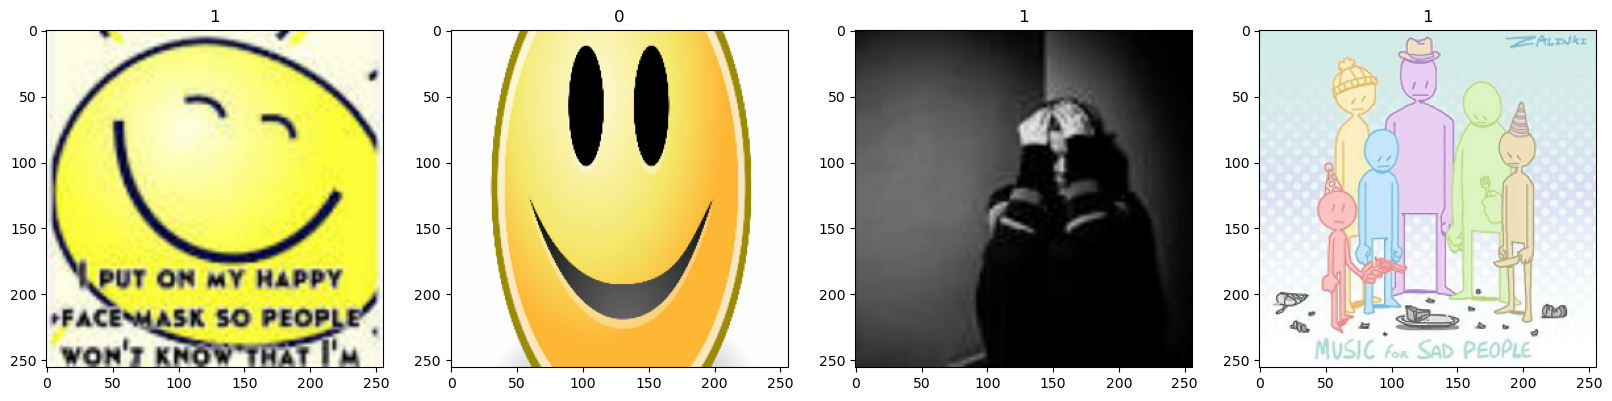

In [465]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for i,img in enumerate(batch[0][:4]):
    ax[i].imshow(img.astype(int))
    ax[i].title.set_text(batch[1][i])

# Data Scaling

In [466]:
data=data.map(lambda x,y:(x/255,y))

In [467]:

data.as_numpy_iterator().next()

(array([[[[0.9764706 , 0.9843137 , 0.98039216],
          [0.9781556 , 0.98566175, 0.9820772 ],
          [0.9858149 , 0.9917892 , 0.9897365 ],
          ...,
          [0.8235294 , 0.83137256, 0.827451  ],
          [0.8235294 , 0.83137256, 0.827451  ],
          [0.8235294 , 0.83137256, 0.827451  ]],
 
         [[0.9771446 , 0.98498774, 0.98106617],
          [0.97877175, 0.9862779 , 0.9826933 ],
          [0.9861677 , 0.992142  , 0.9900893 ],
          ...,
          [0.8225342 , 0.83037734, 0.8264558 ],
          [0.8227975 , 0.8306406 , 0.82671905],
          [0.8228554 , 0.83069855, 0.826777  ]],
 
         [[0.98020834, 0.9880515 , 0.9841299 ],
          [0.98157215, 0.9890783 , 0.9854937 ],
          [0.98777145, 0.9937457 , 0.991693  ],
          ...,
          [0.8180104 , 0.8258535 , 0.82193196],
          [0.81947047, 0.8273136 , 0.82339203],
          [0.8197917 , 0.8276348 , 0.82371324]],
 
         ...,
 
         [[0.22503063, 0.17797181, 0.27208945],
          [0.23631

# Data Splitting

In [468]:
train_size=int(len(data)*0.7)
val_size=int(len(data)*0.2)
test_size=int(len(data)*0.1)

In [469]:
train_size

7

# Model Building

In [470]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [471]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D


In [565]:
model=Sequential()

In [566]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [567]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [568]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 30, 30, 16)       

In [569]:
logdir='logs'
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)
model_train=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 18s 2s/step - loss: 0.9447 - accuracy: 0.5045 - val_loss: 0.6727 - val_accuracy: 0.6406
Epoch 2/20
7/7 [==============================] - 15s 2s/step - loss: 0.6510 - accuracy: 0.6607 - val_loss: 0.5966 - val_accuracy: 0.6094
Epoch 3/20
7/7 [==============================] - 15s 2s/step - loss: 0.5189 - accuracy: 0.7411 - val_loss: 0.4161 - val_accuracy: 0.8281
Epoch 4/20
7/7 [==============================] - 15s 2s/step - loss: 0.4704 - accuracy: 0.8170 - val_loss: 0.3683 - val_accuracy: 0.8750
Epoch 5/20
7/7 [==============================] - 15s 2s/step - loss: 0.3691 - accuracy: 0.9241 - val_loss: 0.2508 - val_accuracy: 0.9219
Epoch 6/20
7/7 [==============================] - 15s 2s/step - loss: 0.2038 - accuracy: 0.9330 - val_loss: 0.1838 - val_accuracy: 0.9375
Epoch 7/20
7/7 [==============================] - 15s 2s/step - loss: 0.2358 - accuracy: 0.9196 - val_loss: 0.1166 - val_accuracy: 1.0000
Epoch 8/20
7/7 [==================

# Model Evaluation

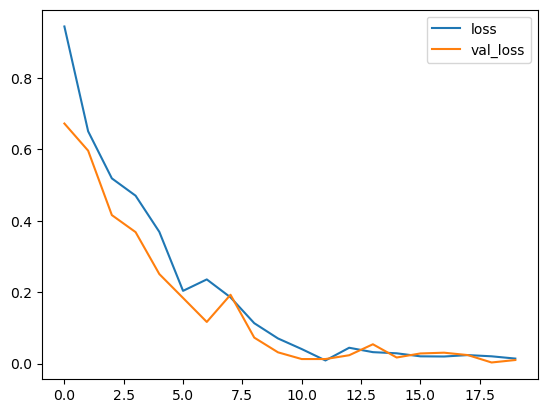

In [570]:
plt.plot(model_train.history['loss'],label='loss')
plt.plot(model_train.history['val_loss'],label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

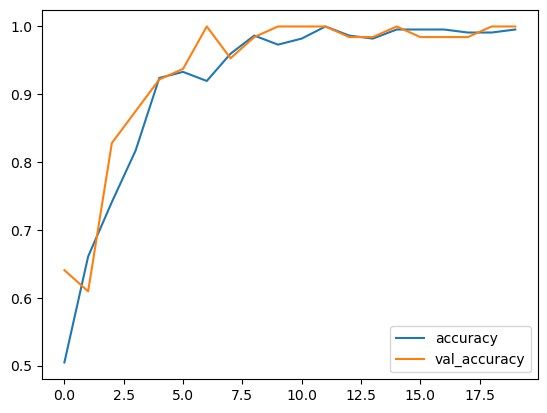

In [580]:
plt.plot(model_train.history['accuracy'], label='accuracy')
plt.plot(model_train.history['val_accuracy'], label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

In [617]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [618]:
precision=Precision()
recall=Recall()
binary_accuracy=BinaryAccuracy()

In [620]:
for batch in test.as_numpy_iterator():
      X,y=batch
      yhat=model.predict(X)
      precision.update_state(y, yhat)
      recall.update_state(y, yhat)
      binary_accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 110ms/step


In [621]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


1/1 [==============================] - 0s 100ms/step


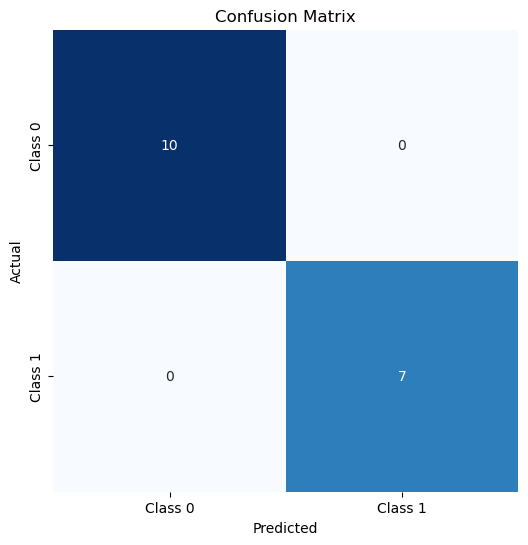

In [650]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict on the test data
y_true = []
y_pred = []

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    yhat = (yhat > 0.5).astype(int)  # Convert probabilities to binary predictions
    y_true.extend(y)
    y_pred.extend(yhat)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Predication

In [607]:
import cv2

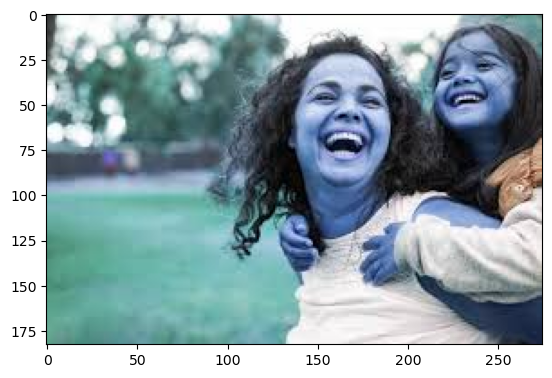

In [608]:
img=cv2.imread('images (1).jpg')
plt.imshow(img)
plt.show()

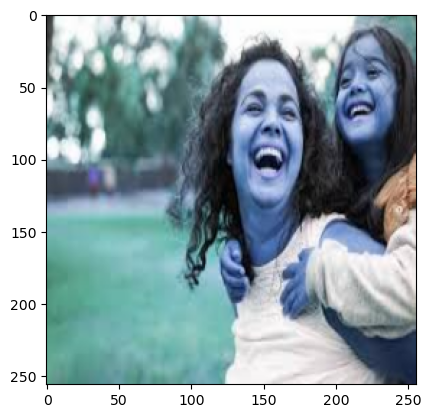

In [609]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [610]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 60ms/step


In [611]:
yhat

array([[0.35817495]], dtype=float32)

In [612]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [563]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','imageclassifier.h5'))


In [622]:
new_model = load_model('models/imageclassifier.h5')

In [651]:
20*17

340